<a href="https://colab.research.google.com/github/PranavChouhan10/EV-Market-Segmentation/blob/main/EV_Geographic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install pyshp

In [64]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
import plotly.graph_objects as go
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
sns.set_style('whitegrid')

In [65]:
# Load datasets
electric_vehicle_data = pd.read_csv('/content/Current Sales of Electric Vehicles.csv')
charging_stations_data = pd.read_csv('/content/CS_station.csv')
ev_charging_sanctioned_data = pd.read_csv('/content/CS_Sanctioned.csv')
highways_charging_stations_data = pd.read_csv('/content/CS_Highway.csv')

In [66]:
electric_vehicle_data

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Islands,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,NaN,NaN,368.0,100.0,13428
6,Delhi,14730,112831.0,3051,49.0,39.0,NaN,NaN,NaN,1602.0,132302
7,Goa,1314,28.0,289,13.0,36.0,2.0,NaN,NaN,4.0,1686
8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,NaN,26.0,77.0,17593
9,Haryana,7777,18595.0,186,122.0,8.0,2.0,NaN,NaN,90.0,26780


In [67]:
charging_stations_data

,Sl. No.,State/ UT,Charging Stations
0,1,Telangana,56
1,2,Jharkhand,29
2,3,Goa,26
3,4,Karnataka,48
4,5,Himachal Pradesh,9
5,6,Uttar Pradesh,15
6,7,Rajasthan,49
7,8,Delhi,94
8,9,Chandigarh UT,48
9,Total,Total,374


In [68]:
ev_charging_sanctioned_data

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,159
8,West Bengal,141
9,Telangana,138


In [69]:
highways_charging_stations_data

,Sl. No.,Highways/Expressways,Charging Stations
0,1,Mumbai - Pune Expressway,10
1,2,Surat-Mumbai Expressway,30
2,3,Mumbai - Delhi Highway,124
3,4,Mumbai - Panaji Highway,60
4,5,Mumbai - Nagpur Highway,70
5,6,Mumbai - Bengaluru Highway,100
6,7,Agra-Nagpur,80
7,8,Kolkata- Nagpur,120
8,9,Delhi-Jaipur- Agra Highway,29
9,10,Jaipur- Delhi Highway,9


In [70]:
# Data Cleaning for Electric Vehicle Data
electric_vehicle_data = electric_vehicle_data.fillna(0)
electric_vehicle_data = electric_vehicle_data[~electric_vehicle_data['State Name'].str.contains('Total')]  # Remove "Total" row


In [71]:
# Data Cleaning for Charging Stations Data
charging_stations_data = charging_stations_data[~charging_stations_data['State/ UT'].str.contains('Total')]  # Remove "Total" row

In [72]:
# Data Cleaning for Highways/Expressways Charging Stations Data
highways_charging_stations_data = highways_charging_stations_data[~highways_charging_stations_data['Highways/Expressways'].str.contains('Total')]  # Remove "Total" row


In [73]:
# Data Cleaning for Charging Sanctioned Data
ev_charging_sanctioned_data = ev_charging_sanctioned_data[~ev_charging_sanctioned_data['State/UT-wise'].str.contains('Total')]  # Remove "Total" row

In [74]:
# Display cleaned data
print("Cleaned Electric Vehicle Data:")
electric_vehicle_data

Cleaned Electric Vehicle Data:


,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Islands,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,0.0,0.0,368.0,100.0,13428
6,Delhi,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,1602.0,132302
7,Goa,1314,28.0,289,13.0,36.0,2.0,0.0,0.0,4.0,1686
8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,0.0,26.0,77.0,17593
9,Haryana,7777,18595.0,186,122.0,8.0,2.0,0.0,0.0,90.0,26780


In [75]:
print("\nCleaned Charging Stations Data:")
charging_stations_data


Cleaned Charging Stations Data:


,Sl. No.,State/ UT,Charging Stations
0,1,Telangana,56
1,2,Jharkhand,29
2,3,Goa,26
3,4,Karnataka,48
4,5,Himachal Pradesh,9
5,6,Uttar Pradesh,15
6,7,Rajasthan,49
7,8,Delhi,94
8,9,Chandigarh UT,48


In [76]:
print("\nCleaned EV Charging Sanctioned Data:")
ev_charging_sanctioned_data


Cleaned EV Charging Sanctioned Data:


,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,159
8,West Bengal,141
9,Telangana,138


In [77]:
print("\nCleaned Highways/Expressways Charging Stations Data:")
highways_charging_stations_data


Cleaned Highways/Expressways Charging Stations Data:


,Sl. No.,Highways/Expressways,Charging Stations
0,1,Mumbai - Pune Expressway,10
1,2,Surat-Mumbai Expressway,30
2,3,Mumbai - Delhi Highway,124
3,4,Mumbai - Panaji Highway,60
4,5,Mumbai - Nagpur Highway,70
5,6,Mumbai - Bengaluru Highway,100
6,7,Agra-Nagpur,80
7,8,Kolkata- Nagpur,120
8,9,Delhi-Jaipur- Agra Highway,29
9,10,Jaipur- Delhi Highway,9


### Total Electric Vehicle By State




In [78]:
fig = px.bar(electric_vehicle_data, x='State Name', y='Grand Total', title='Total Electric Vehicles by State',
             labels={'State Name': 'State/UT', 'Total EVs': 'Total Electric Vehicles'},
             template='plotly_dark')
fig.update_xaxes(tickangle=-45)
fig.show()

**States/UT to target based on Electric Vehicle**

- Uttar Pradesh
- Delhi
- Karnataka
- Bihar
- Maharashtra


### Different Types of Electric Vehicle Adopted by States

In [79]:
# Visualize Electric Vehicle Adoption by State
fig1 = px.bar(electric_vehicle_data, x='State Name', y=['Two Wheeler', 'Three Wheeler', 'Four Wheeler'],
              title='Electric Vehicle Adoption by State',
              labels={'value': 'Number of Vehicles', 'State Name': 'State'}, height=800)
fig1.show()

**States/UT to target based on High Electric Vehicle Adoption**

Two Wheeler:
- Karnataka
- Maharastra
- Tamil Nadu
- Rajasthan


Three Wheeler:
- Uttar Pradesh
- Delhi
- Bihar
- Assam
- West Bengal
- Rajasthan

Four Wheeler:
- Karnataka
- Ladakh
- Delhi






### Charging Stations in States/UT:

In [80]:
# Visualize Charging Infrastructure by State
fig2 = px.bar(charging_stations_data, x='State/ UT', y='Charging Stations',
              title='Charging Stations by State',
              labels={'Charging Stations': 'Number of Charging Stations', 'State/ UT': 'State'})
fig2.show()

**States/UT to target based on Charging Stations**

- Delhi
- Telangana
- Rajasthan
- Karnataka
- Chandigarh UT


### Sanctioned Charging Stations:

In [81]:
# Visualize EV Charging Sanctioned by State
fig3 = px.bar(ev_charging_sanctioned_data, x='State/UT-wise', y='Number of Electric Vehicle Charging Sanctioned',
              title='Electric Vehicle Charging Sanctioned by State',
              labels={'Number of Electric Vehicle Charging Sanctioned': 'Number of Charging Sanctioned', 'State/UT': 'State'})
fig3.show()

**States to target based on charging stations sanctioned**

- Maharashtra
- Andhra Pradesh
- Tamil Nadu
- Gujarat
- Uttar Pradesh
- Rajasthan
- Karnataka

### Charging stations on highway:


In [82]:
# Visualize Charging Stations on Highways/Expressways
fig4 = px.bar(highways_charging_stations_data, x='Highways/Expressways', y='Charging Stations',
              title='Charging Stations on Highways/Expressways',
              labels={'Charging Stations': 'Number of Charging Stations', 'Highways/Expressways': 'Highways/Expressways'})
fig4.show()

**Based on number of charging stations, the following city / state could be targeted**

- Mumbai (Maharashtra)
- Nagpur (Maharashtra)
- Delhi
- Kolkata (West Bengal)
- Bengaluru (Karnataka)
- Agra (Uttar Pradesh)

In [83]:
fp = r'/content/india_st.shp'
map_df = gpd.read_file(fp)
map_df_copy = gpd.read_file(fp)
map_df.head()

,STATE,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457..."
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888..."
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368..."
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523..."


<Axes: title={'center': 'Number of Electric Vehicle in the State'}>

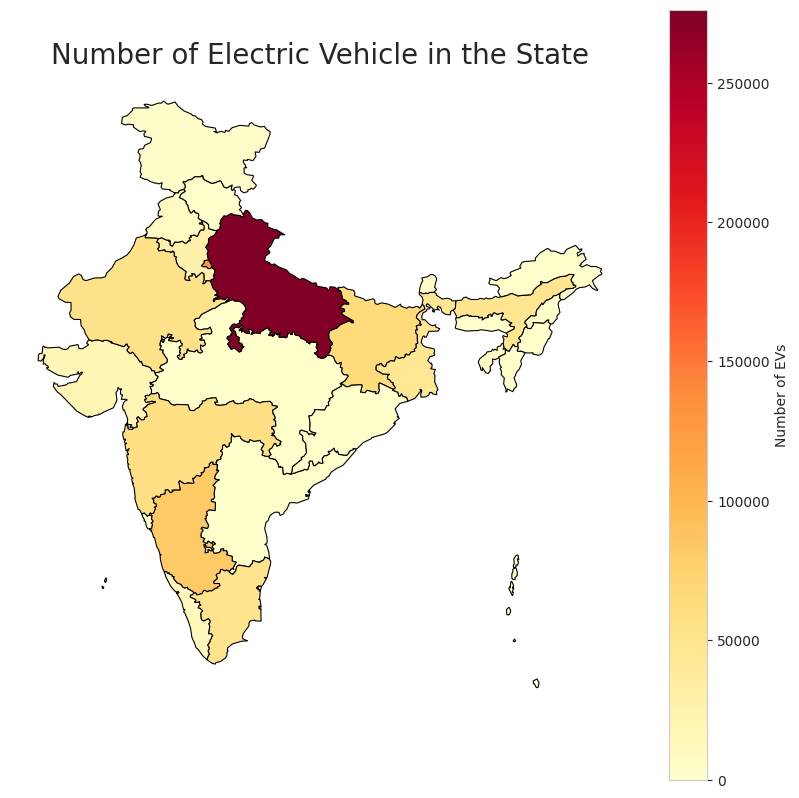

In [84]:
# Create a new dataframe for state names and total Evs
electric_vehicle_data_copy = electric_vehicle_data[['State Name', 'Grand Total']].copy()
electric_vehicle_data_copy['State Name'] = electric_vehicle_data_copy['State Name'].str.upper()

#Merging the data
merged = map_df.set_index('STATE').join(electric_vehicle_data_copy.set_index('State Name'))
merged['Grand Total'] = merged['Grand Total'].replace(np.nan, 0)

#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Number of Electric Vehicle in the State', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
merged.plot(column='Grand Total',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of EVs"})

### According to the above plot we can conclude that UP consist of highest number of EV's in the country.

<Axes: title={'center': 'Number of Electric Vehicle Charging Sanctioned'}>

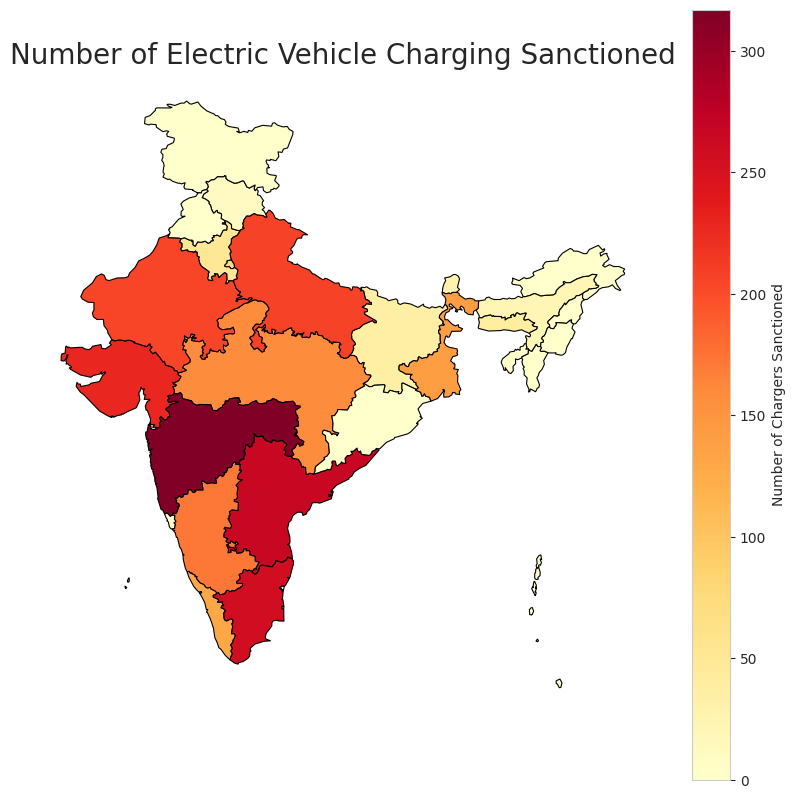

In [85]:
# Create a new dataframe for state names and charger sanctioned
ev_charging_sanctioned_data_copy = ev_charging_sanctioned_data[['State/UT-wise', 'Number of Electric Vehicle Charging Sanctioned']].copy()
ev_charging_sanctioned_data_copy['State/UT-wise'] = ev_charging_sanctioned_data_copy['State/UT-wise'].str.upper()

#Merging the data
merged = map_df.set_index('STATE').join(ev_charging_sanctioned_data_copy.set_index('State/UT-wise'))
merged['Number of Electric Vehicle Charging Sanctioned'] = merged['Number of Electric Vehicle Charging Sanctioned'].replace(np.nan, 0)

#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Number of Electric Vehicle Charging Sanctioned', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
merged.plot(column='Number of Electric Vehicle Charging Sanctioned',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of Chargers Sanctioned"})

### And from the above plot we can see that states like Maharastra, Andhra Pradesh, Tamil Nadu, Gujarat and UP have the highest number of EV charging sanctioned.

In [93]:
# Merge datasets based on State/UT
merged_data = pd.merge(electric_vehicle_data, charging_stations_data, how='left', left_on='State Name', right_on='State/ UT')
merged_data = pd.merge(merged_data, ev_charging_sanctioned_data, how='left', left_on='State Name', right_on='State/UT-wise')

# Select relevant columns for clustering
selected_columns = ['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Charging Stations', 'Number of Electric Vehicle Charging Sanctioned']

# Handle missing values by imputing with zeros
imputer = SimpleImputer(strategy='constant', fill_value=0)
cluster_data_imputed = imputer.fit_transform(merged_data[selected_columns[1:]])  # Exclude 'State Name'

# Standardize the imputed data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data_imputed)

# Perform K-means clustering
num_clusters = 5  # You can adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add cluster labels and state names to the merged data
merged_data['Cluster'] = cluster_labels
merged_data['State'] = merged_data['State Name']

# Visualize clusters
fig = px.scatter_3d(merged_data, x='Two Wheeler', y='Three Wheeler', z='Four Wheeler',
                    color='Cluster', title='Clustering of States Based on EV Adoption, Charging Infrastructure, and EV Charging Sanctions',
                    labels={'Two Wheeler': 'Two Wheeler', 'Three Wheeler': 'Three Wheeler', 'Four Wheeler': 'Four Wheeler'},
                    opacity=0.8, hover_name='State')
fig.update_layout(scene=dict(zaxis_title='EV Charging Sanctions'))
fig.show()

# Display the cluster characteristics
cluster_characteristics = merged_data.groupby('Cluster')[selected_columns[1:]].mean()
print(cluster_characteristics)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



          Two Wheeler  Three Wheeler  Four Wheeler  Goods Vehicles  \
Cluster                                                              
0        25363.000000    4905.500000     65.000000     1179.000000   
1         1861.727273    7735.863636    505.090909       12.227273   
2        35733.500000   64654.500000   5131.500000      101.000000   
3        20219.200000   16143.600000    892.400000       30.800000   
4        18295.000000  257159.000000    368.000000       53.000000   

         Charging Stations  Number of Electric Vehicle Charging Sanctioned  
Cluster                                                                     
0                      NaN                                           140.5  
1                21.333333                                            29.4  
2                71.000000                                           122.0  
3                49.000000                                           204.4  
4                15.000000                     

### Let's examine the average characteristics of each cluster:

####- Cluster 0 - High EV Adoption, Moderate Charging Infrastructure, Moderate EV Charging Sanctions.

    States: Tamil Nadu and Chhattisgarh

####- Cluster 1 - Low to Moderate EV Adoption, Low Charging Infrastructure, Low EV Charging Sanctions.

    States: Odisha, Punjab, Bihar, Assam, Haryana, Ladhakh, Sikkim, Jharkhand, Puducherry, Goa, Jammu Kashmir, Himachal Pradesh, Nagaland, Tirupura, Chandigarh, Uttarakhand


####- Cluster 2 - High EV Adoption, High Charging Infrastructure, High EV Charging Sanctions.

    States: Karnataka And Delhi

####- Cluster 3 - Moderate EV Adoption, Moderate Charging Infrastructure, High EV Charging Sanctions.

    States: Maharastra, Rajasthan, West Bengal, Gujarat, Kerala

####- Cluster 4 - High EV Adoption (Mainly Three Wheelers and Four Wheelers), Low Charging Infrastructure, Low EV Charging Sanctions.

    States: Uttar Pradesh

###- Recommendation:

Based on the clustering analysis and our goal of maximizing profit, it is recommended to start the EV company in a state from Cluster 2. This cluster represents states with high adoption of various types of vehicles (Two Wheelers, Three Wheelers, and Four Wheelers), a substantial number of Charging Stations, and a significant number of Electric Vehicle Charging Sanctions. These factors indicate a favorable environment for EV adoption and a potentially lucrative market.

###- Profitable Vehicle Type:

Given the characteristics of Cluster 2, the company should consider producing a range of electric vehicles, including Two Wheelers, Three Wheelers, and Four Wheelers. However, since the adoption of Four Wheelers is relatively high in this cluster, focusing on producing electric Four Wheelers could potentially lead to maximum profitability.

### In summary, the recommended strategy is to start the EV company in a state from Cluster 2, where high adoption of various vehicle types and a supportive charging infrastructure provide a strong foundation for success. The company should prioritize the production of electric Four Wheelers to tap into the existing demand and achieve maximum profitability in the chosen state.